In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Import the Excel file

# %pip install openpyxl
dm_records = pd.read_excel('../data/raw/FACT sales.xlsx')
dm_records.head()

,SKU,Row ID,Order ID,Order Date,Priority,Quantity,Sales,COGS,Profit,Shipping Type,Customer Name,Branch,Customer Segment,Shipping Date
0,1,1,3,2010-10-13,Low,600,26154.00,21962.64,4191.36,Regular Air,Muhammed MacIntyre,Richmond,SMEs,2010-10-20
1,2,49,293,2012-10-01,High,4900,1012302.00,990343.80,21958.20,Ground,Barry French,Richmond,Consumer,2012-10-02
2,3,50,293,2012-10-01,High,2700,24457.00,23769.86,687.14,Regular Air,Barry French,Richmond,Consumer,2012-10-03
3,4,80,483,2011-07-10,High,3000,496575.95,534879.05,-38303.10,Regular Air,Clay Rozendal,Richmond,Corporate,2011-07-12
4,5,85,515,2010-08-28,Not Specified,1900,39427.00,39175.36,251.64,Regular Air,Carlos Soltero,Richmond,Consumer,2010-08-30


# 1. EDA
- Get to know the domain
- Explore your data
- Clean your data
- Take a look and find connections between data

In [87]:
dm_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SKU               8399 non-null   int64         
 1   Row ID            8399 non-null   int64         
 2   Order ID          8399 non-null   int64         
 3   Order Date        8399 non-null   datetime64[ns]
 4    Priority         8399 non-null   object        
 5   Quantity          8399 non-null   int64         
 6   Sales             8399 non-null   float64       
 7   COGS              8399 non-null   float64       
 8   Profit            8399 non-null   float64       
 9   Shipping Type     8399 non-null   object        
 10  Customer Name     8399 non-null   object        
 11  Branch            8399 non-null   object        
 12  Customer Segment  8399 non-null   object        
 13  Shipping Date     8399 non-null   datetime64[ns]
dtypes: datetime64[ns](2), fl

In [88]:
dm_corr = round(dm_records.corr(numeric_only=True), 2)

In [89]:
round(dm_records.describe(), 2)

,SKU,Row ID,Order ID,Order Date,Quantity,Sales,COGS,Profit,Shipping Date
count,8399.00,8399.00,8399.00,8399,8399.00,8399.00,8399.00,8399.00,8399
mean,542.64,4200.00,29965.18,2010-12-25 00:40:58.578402048,2557.17,177587.82,177138.01,449.81,2010-12-27 01:28:48.634361088
min,1.00,1.00,3.00,2009-01-01 00:00:00,100.00,224.00,1.44,-807653.60,2009-01-02 00:00:00
25%,247.00,2100.50,15011.50,2009-12-20 00:00:00,1300.00,14319.50,13302.01,109.60,2009-12-22 12:00:00
50%,502.00,4200.00,29857.00,2010-12-17 00:00:00,2600.00,44942.00,45047.50,755.30,2010-12-18 00:00:00
75%,817.00,6299.50,44596.00,2012-01-01 12:00:00,3800.00,170932.00,171825.74,2448.93,2012-01-03 12:00:00
max,1289.00,8399.00,59973.00,2012-12-30 00:00:00,5000.00,8906105.00,8903102.66,236598.18,2012-12-30 00:00:00
std,344.42,2424.73,17260.88,NaN,1448.11,358505.05,358353.51,20841.38,NaN


In [90]:
dm_corr.style.background_gradient(cmap='coolwarm')

,SKU,Row ID,Order ID,Quantity,Sales,COGS,Profit
SKU,1.000000,0.030000,0.030000,0.030000,-0.000000,-0.000000,0.010000
Row ID,0.030000,1.000000,1.000000,0.010000,-0.010000,-0.010000,-0.010000
Order ID,0.030000,1.000000,1.000000,0.010000,-0.010000,-0.010000,-0.010000
Quantity,0.030000,0.010000,0.010000,1.000000,0.220000,0.220000,0.020000
Sales,-0.000000,-0.010000,-0.010000,0.220000,1.000000,1.000000,0.040000
COGS,-0.000000,-0.010000,-0.010000,0.220000,1.000000,1.000000,-0.020000
Profit,0.010000,-0.010000,-0.010000,0.020000,0.040000,-0.020000,1.000000


#### First impressions
- The minimum value for 'Profit' is extremely negative
- We do not know for sure which customer segment are related these outliers to
- As profits depend on the subtraction of costs from sales, the outlier is going to be handle on COGS and Sales

# Outliers handling by Customer Segment

### 1. Removing Profit column

In [91]:
dm_records.drop(columns='Profit', inplace=True)

### 2. Splitting the Dataframe by Segment

In [92]:
dm_records['Customer Segment'].unique()

array(['SMEs', 'Consumer', 'Corporate', 'Home Office'], dtype=object)

In [93]:
dm_SMEs = dm_records[dm_records['Customer Segment'] == 'SMEs']
dm_Consumer = dm_records[dm_records['Customer Segment'] == 'Consumer']
dm_Corporate = dm_records[dm_records['Customer Segment'] == 'Corporate']
dm_Home_Office = dm_records[dm_records['Customer Segment'] == 'Home Office']

### 3. Detecting and Removing Outliers by Segment

In [94]:
round(dm_SMEs.describe(), 2)

,SKU,Row ID,Order ID,Order Date,Quantity,Sales,COGS,Shipping Date
count,1642.00,1642.00,1642.00,1642,1642.00,1642.00,1642.00,1642
mean,538.00,4313.10,30776.49,2010-12-23 07:18:29.378806272,2539.16,169812.48,169563.64,2010-12-25 06:20:36.540804096
min,1.00,1.00,3.00,2009-01-01 00:00:00,100.00,320.00,78.10,2009-01-02 00:00:00
25%,246.25,2203.25,15904.00,2009-12-28 00:00:00,1300.00,13487.75,12352.30,2009-12-30 00:00:00
50%,500.00,4453.00,31733.00,2010-12-07 00:00:00,2500.00,43863.50,44473.59,2010-12-09 00:00:00
75%,816.75,6399.75,45413.00,2011-12-27 00:00:00,3800.00,167781.75,167917.32,2011-12-28 00:00:00
max,1284.00,8399.00,59973.00,2012-12-30 00:00:00,5000.00,3336785.00,3336603.56,2012-12-30 00:00:00
std,343.81,2431.24,17313.33,NaN,1447.68,335671.31,335176.78,NaN


#### 3.1. SMEs

- COGS

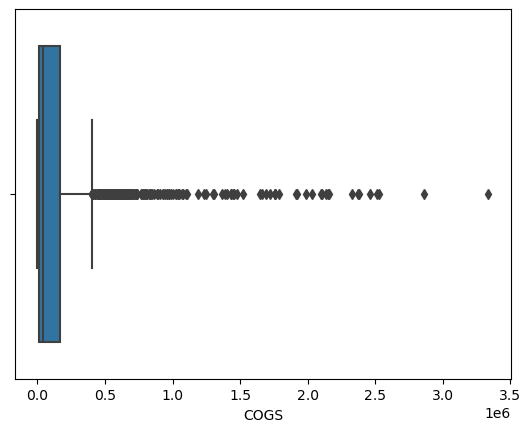

In [95]:
# COGS

sns.boxplot(x = dm_SMEs['COGS'])
plt.show()

In [96]:
SMEs_cogs_mean = dm_SMEs['COGS'].mean()
SMEs_cogs_std = dm_SMEs['COGS'].std()
cut_off = SMEs_cogs_std * 3

lower, upper = SMEs_cogs_mean - cut_off, SMEs_cogs_mean + cut_off
print(lower,',', upper)

-835966.7051790095 , 1175093.9898075112


The lower threshold (-835966.7) is lesser than the min value for COGS in the describe method (78.10).
So let's do this small change:

In [97]:
lower = min(dm_SMEs['COGS'])
print(lower)

78.09999999999764


In [98]:
dm_SMEs = dm_SMEs[(dm_SMEs['COGS'] < upper) &
                                         (dm_SMEs['COGS'] > lower)]

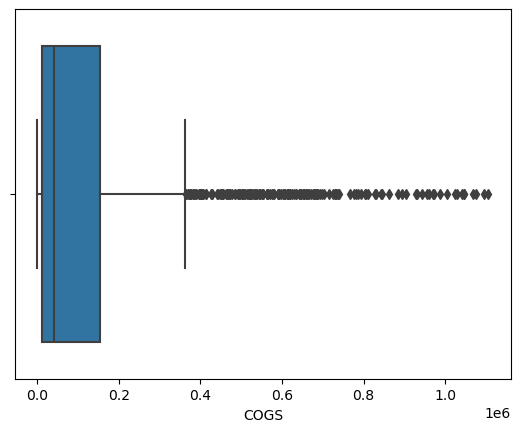

In [99]:
sns.boxplot(x = dm_SMEs['COGS'])
plt.show()

- Sales

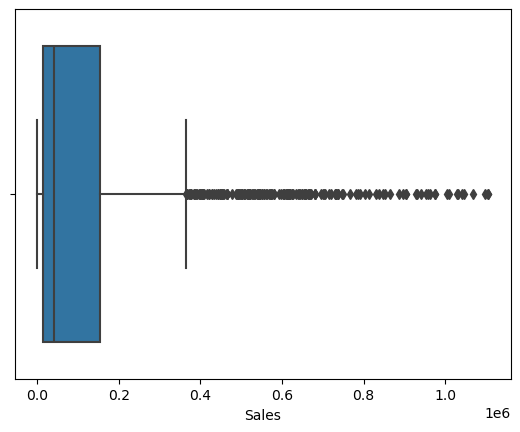

In [100]:
# Sales
sns.boxplot(x = dm_SMEs['Sales'])
plt.show()

-461287.46938388085 , 718979.5344899982
320.0 , 718979.5344899982


C:\Users\andre\AppData\Local\Temp\ipykernel_3192\2183173943.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dm_SMEs = dm_SMEs[(dm_records['Sales'] < upper) &


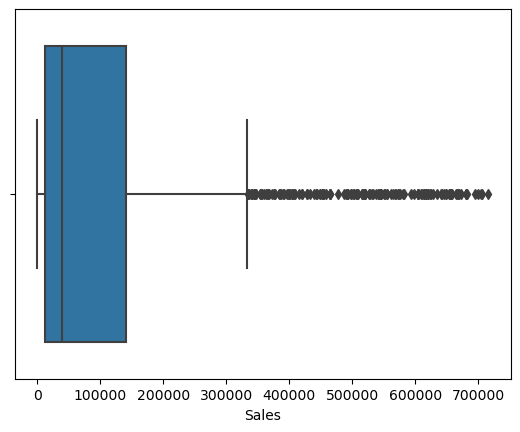

In [101]:
# Sales

SMEs_sales_mean = dm_SMEs['Sales'].mean()
SMEs_sales_std = dm_SMEs['Sales'].std()
cut_off = SMEs_sales_std * 3

lower, upper = SMEs_sales_mean - cut_off, SMEs_sales_mean + cut_off
print(lower,',',upper)
lower = min(dm_SMEs['Sales'])
print(lower,',',upper)

dm_SMEs = dm_SMEs[(dm_records['Sales'] < upper) &
                                         (dm_SMEs['Sales'] > lower)]
sns.boxplot(x = dm_SMEs['Sales'])
plt.show()

#### 3.2. Consumer

- COGS

In [102]:
# COGS dm_Consumer
round(dm_Consumer.describe(),2)

,SKU,Row ID,Order ID,Order Date,Quantity,Sales,COGS,Shipping Date
count,1649.00,1649.00,1649.00,1649,1649.00,1649.00,1649.00,1649
mean,551.64,4155.63,29651.30,2010-12-02 13:16:24.596725248,2532.44,185786.00,185541.77,2010-12-04 12:35:22.013341440
min,1.00,11.00,66.00,2009-01-02 00:00:00,100.00,568.00,1.44,2009-01-02 00:00:00
25%,240.00,2004.00,14275.00,2009-12-09 00:00:00,1300.00,14366.70,13056.30,2009-12-11 00:00:00
50%,524.00,4079.00,29058.00,2010-11-21 00:00:00,2500.00,47011.00,46813.85,2010-11-23 00:00:00
75%,827.00,6372.00,45217.00,2011-11-28 00:00:00,3800.00,167727.00,167949.84,2011-12-01 00:00:00
max,1288.00,8378.00,59845.00,2012-12-30 00:00:00,5000.00,8906105.00,8903102.66,2012-12-30 00:00:00
std,348.97,2472.66,17604.12,NaN,1425.44,411219.82,411425.44,NaN


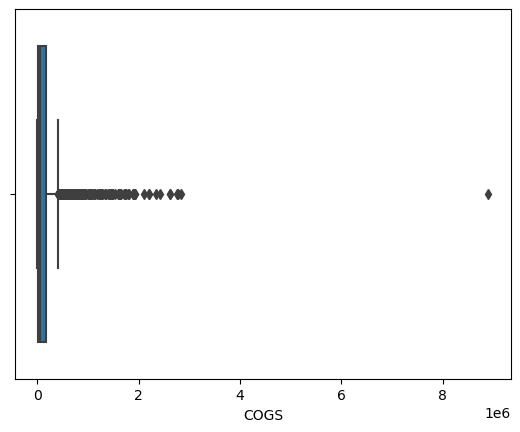

In [103]:
# COGS

sns.boxplot(x = dm_Consumer['COGS'])
plt.show()

In [104]:
# COGS dm_Consumer

Consumer_cogs_mean = dm_Consumer['COGS'].mean()
Consumer_cogs_std = dm_Consumer['COGS'].std()
cut_off = Consumer_cogs_std * 3

lower, upper = Consumer_cogs_mean - cut_off, Consumer_cogs_mean + cut_off
print(lower,',', upper)

-1048734.565860285 , 1419818.1022581016


In [105]:
lower = min(dm_Consumer['COGS'])
print(lower)

1.4400000000000546


In [106]:
dm_Consumer = dm_Consumer[(dm_Consumer['COGS'] < upper) &
                                         (dm_Consumer['COGS'] > lower)]

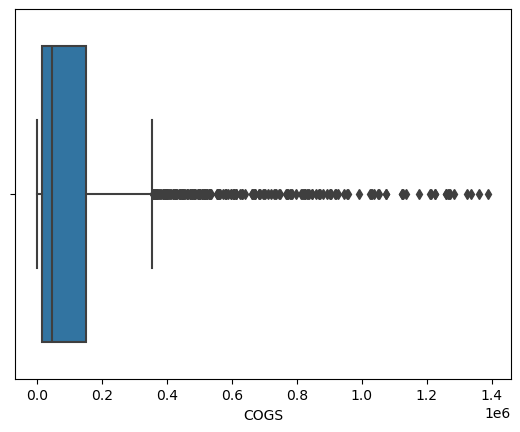

In [107]:
sns.boxplot(x = dm_Consumer['COGS'])
plt.show()

- Sales

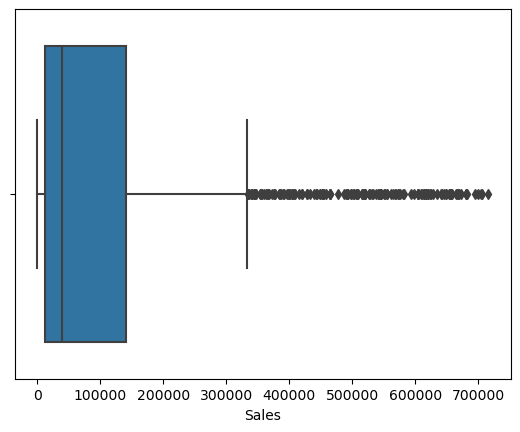

In [108]:
# Sales dm_Consumer
sns.boxplot(x = dm_SMEs['Sales'])
plt.show()

In [109]:
# Sales dm_Consumer

Consumer_sales_mean = dm_Consumer['Sales'].mean()
Consumer_sales_std = dm_Consumer['Sales'].std()
cut_off = Consumer_sales_std * 3

lower, upper = Consumer_sales_mean - cut_off, Consumer_sales_mean + cut_off
print(lower,',', upper)

-543505.5369296127 , 823353.1404121998


In [110]:
lower = min(dm_Consumer['Sales'])
print(lower)

568.0


In [111]:
dm_Consumer = dm_Consumer[(dm_Consumer['Sales'] < upper) &
                                         (dm_Consumer['Sales'] > lower)]

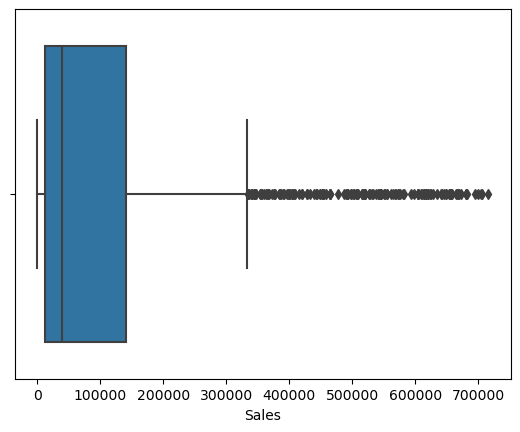

In [112]:
sns.boxplot(x = dm_SMEs['Sales'])
plt.show()

#### 3.3. Corporate

- COGS

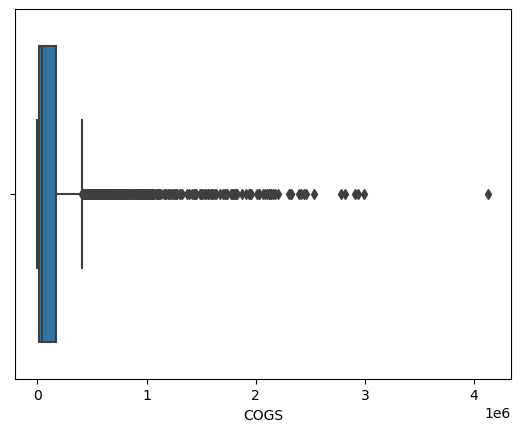

In [113]:
# COGS dm_Corporate
sns.boxplot(x = dm_Corporate['COGS'])
plt.show()

In [114]:
round(dm_Corporate.describe(),2)

,SKU,Row ID,Order ID,Order Date,Quantity,Sales,COGS,Shipping Date
count,3076.00,3076.00,3076.00,3076,3076.00,3076.00,3076.00,3076
mean,530.22,4138.81,29526.97,2011-01-01 13:57:30.195058432,2552.57,178768.04,178321.22,2011-01-03 15:43:18.179453952
min,1.00,2.00,6.00,2009-01-02 00:00:00,100.00,224.00,5.68,2009-01-02 00:00:00
25%,242.00,2053.75,14662.00,2009-12-18 00:00:00,1300.00,14292.50,13229.17,2009-12-19 18:00:00
50%,479.00,4141.50,29383.00,2010-12-26 00:00:00,2600.00,43099.50,42640.05,2010-12-30 00:00:00
75%,797.25,6191.25,43875.00,2012-01-12 00:00:00,3800.00,173441.25,172266.74,2012-01-14 00:00:00
max,1289.00,8391.00,59942.00,2012-12-30 00:00:00,5000.00,4134321.00,4128934.92,2012-12-30 00:00:00
std,340.82,2405.69,17119.18,NaN,1455.15,352211.54,352070.99,NaN


In [115]:
# COGS dm_Corporate

Corporate_cogs_mean = dm_Corporate['COGS'].mean()
Corporate_cogs_std = dm_Corporate['COGS'].std()
cut_off = Corporate_cogs_std * 3

lower, upper = Corporate_cogs_mean - cut_off, Corporate_cogs_mean + cut_off
print(lower,',', upper)

-877891.7520503646 , 1234534.1848787132


In [116]:
lower = min(dm_Corporate['COGS'])
print(lower)

5.6799999999993815


In [117]:
dm_Corporate = dm_Corporate[(dm_Corporate['COGS'] < upper) &
                                         (dm_Corporate['COGS'] > lower)]

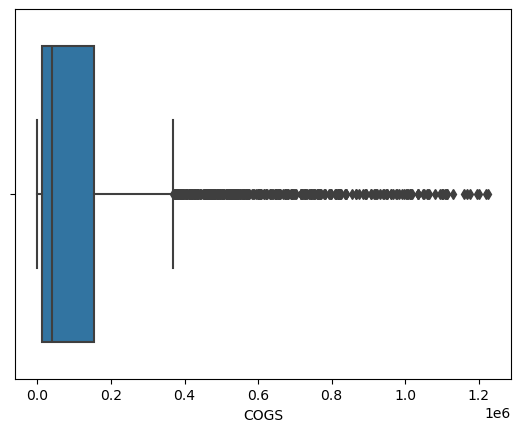

In [118]:
sns.boxplot(x = dm_Corporate['COGS'])
plt.show()

- Sales

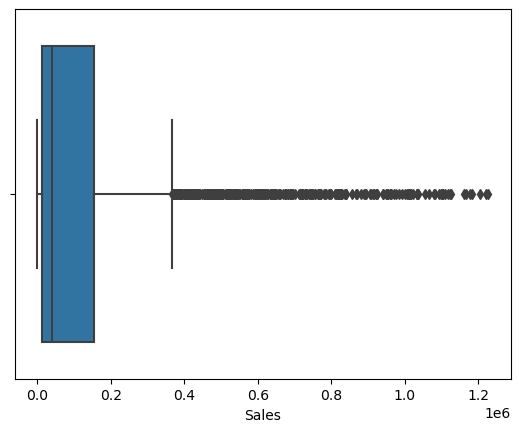

In [119]:
# Sales dm_Corporate
sns.boxplot(x = dm_Corporate['Sales'])
plt.show()

In [120]:
# Sales dm_Corporate

Corporate_sales_mean = dm_Corporate['Sales'].mean()
Corporate_sales_std = dm_Corporate['Sales'].std()
cut_off = Corporate_sales_std * 3

lower, upper = Corporate_sales_mean - cut_off, Corporate_sales_mean + cut_off
print(lower,',', upper)

-498155.8182557899 , 767479.6738966444


In [121]:
lower = min(dm_Corporate['Sales'])
print(lower)

224.00000000000003


In [122]:
dm_Corporate = dm_Corporate[(dm_Corporate['Sales'] < upper) &
                                         (dm_Corporate['Sales'] > lower)]

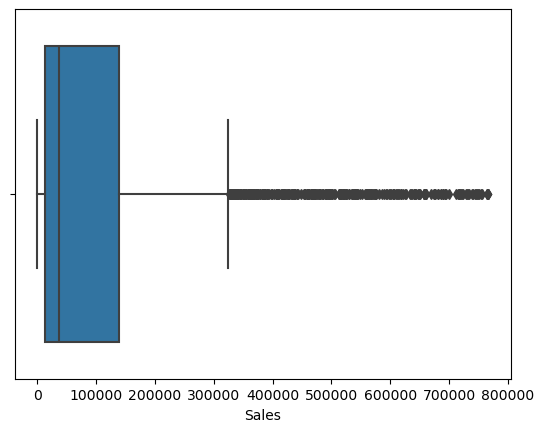

In [123]:
sns.boxplot(x = dm_Corporate['Sales'])
plt.show()

#### 3.4. Home Office

- COGS

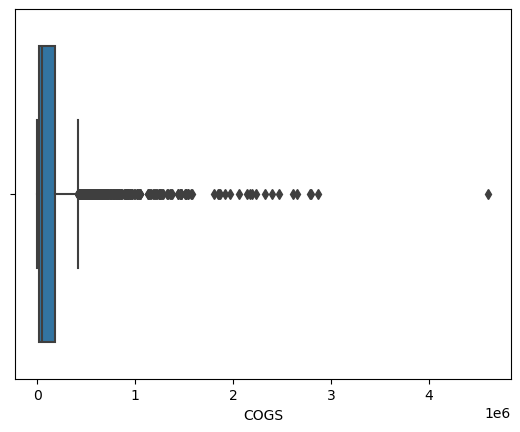

In [124]:
sns.boxplot(x = dm_Home_Office['COGS'])
plt.show()

In [126]:
round(dm_Home_Office.describe(),2)

,SKU,Row ID,Order ID,Order Date,Quantity,Sales,COGS,Shipping Date
count,2032.00,2032.00,2032.00,2032,2032.00,2032.00,2032.00,2032
mean,557.91,4237.24,30227.66,2011-01-02 05:26:41.574802944,2598.77,175431.29,174647.73,2011-01-04 07:24:19.842519808
min,2.00,9.00,36.00,2009-01-01 00:00:00,100.00,377.00,65.35,2009-01-03 00:00:00
25%,263.00,2149.75,15397.00,2010-01-04 00:00:00,1300.00,15432.25,14419.09,2010-01-05 00:00:00
50%,535.00,4246.50,30214.50,2010-12-29 00:00:00,2600.00,47433.65,45939.67,2011-01-02 00:00:00
75%,840.00,6357.50,45097.25,2012-01-06 00:00:00,3900.00,173582.50,175090.79,2012-01-08 00:00:00
max,1286.00,8397.00,59971.00,2012-12-30 00:00:00,5000.00,4592376.00,4604164.20,2012-12-30 00:00:00
std,346.08,2406.70,17134.96,NaN,1456.19,339500.19,339249.19,NaN


In [125]:
# COGS dm_Home_Office

Home_Office_cogs_mean = dm_Home_Office['COGS'].mean()
Home_Office_cogs_std = dm_Home_Office['COGS'].std()
cut_off = Home_Office_cogs_std * 3

lower, upper = Home_Office_cogs_mean - cut_off, Home_Office_cogs_mean + cut_off
print(lower,',', upper)

-843099.8306408366 , 1192395.2866250887


In [127]:
lower = min(dm_Home_Office['COGS'])
print(lower)

65.35000000000036


In [128]:
dm_Home_Office = dm_Home_Office[(dm_Home_Office['COGS'] < upper) &
                                         (dm_Home_Office['COGS'] > lower)]

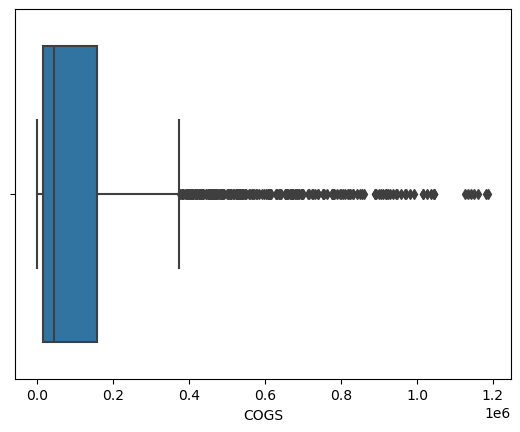

In [129]:
sns.boxplot(x = dm_Home_Office['COGS'])
plt.show()

- Sales

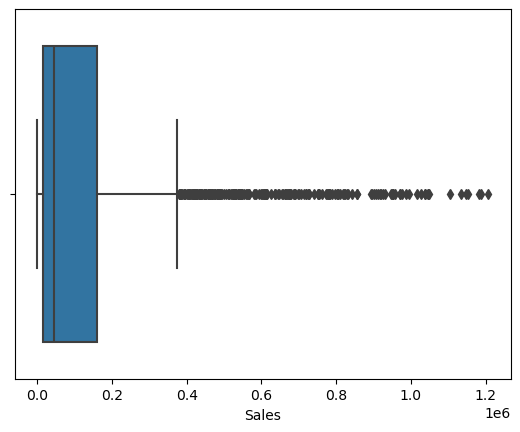

In [130]:
sns.boxplot(x = dm_Home_Office['Sales'])
plt.show()

In [131]:
# Sales dm_Home_Office

Home_Office_sales_mean = dm_Home_Office['Sales'].mean()
Home_Office_sales_std = dm_Home_Office['Sales'].std()
cut_off = Home_Office_sales_std * 3

lower, upper = Home_Office_sales_mean - cut_off, Home_Office_sales_mean + cut_off
print(lower,',', upper)

-479767.7425350789 , 750882.3232616177


In [132]:
lower = min(dm_Home_Office['Sales'])
print(lower)

377.0


In [133]:
dm_Home_Office = dm_Home_Office[(dm_Home_Office['Sales'] < upper) &
                                         (dm_Home_Office['Sales'] > lower)]

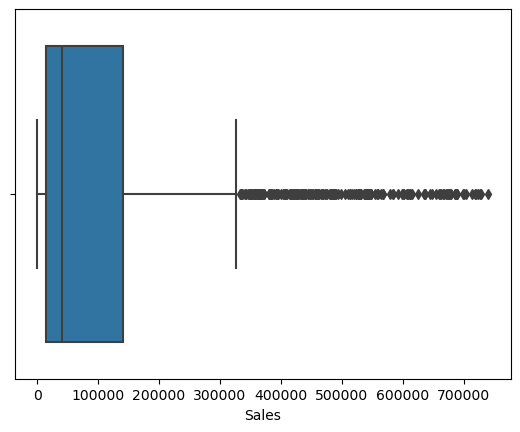

In [134]:
sns.boxplot(x = dm_Home_Office['Sales'])
plt.show()

### 4. Concating Dataframe

In [135]:
round(dm_SMEs.describe(),2)

,SKU,Row ID,Order ID,Order Date,Quantity,Sales,COGS,Shipping Date
count,1558.00,1558.00,1558.00,1558,1558.00,1558.00,1558.00,1558
mean,537.07,4315.33,30791.86,2010-12-22 10:42:21.720153856,2487.68,108037.95,107958.57,2010-12-24 09:31:11.630295296
min,1.00,1.00,3.00,2009-01-01 00:00:00,100.00,396.00,78.72,2009-01-02 00:00:00
25%,248.25,2213.25,15972.00,2009-12-29 18:00:00,1300.00,12670.25,11660.40,2010-01-03 00:00:00
50%,501.00,4460.00,31794.50,2010-12-03 00:00:00,2400.00,38766.00,38577.73,2010-12-04 12:00:00
75%,814.75,6396.25,45405.00,2011-12-26 18:00:00,3700.00,140948.00,140395.36,2011-12-27 18:00:00
max,1284.00,8399.00,59973.00,2012-12-30 00:00:00,5000.00,715716.00,714593.76,2012-12-30 00:00:00
std,341.65,2425.20,17269.48,NaN,1442.96,152053.63,152251.79,NaN


In [136]:
round(dm_Consumer.describe(),2)

,SKU,Row ID,Order ID,Order Date,Quantity,Sales,COGS,Shipping Date
count,1557.00,1557.00,1557.00,1557,1557.00,1557.00,1557.00,1557
mean,549.38,4142.41,29558.83,2010-12-03 00:40:41.618497024,2496.85,110839.40,110626.12,2010-12-05 00:09:14.913294848
min,1.00,11.00,66.00,2009-01-02 00:00:00,100.00,570.00,13.04,2009-01-02 00:00:00
25%,242.00,1977.00,14115.00,2009-12-12 00:00:00,1300.00,13641.00,12385.04,2009-12-14 00:00:00
50%,527.00,4066.00,28934.00,2010-11-17 00:00:00,2500.00,41262.00,40226.84,2010-11-20 00:00:00
75%,822.00,6372.00,45217.00,2011-11-27 00:00:00,3700.00,131265.00,134506.82,2011-11-29 00:00:00
max,1288.00,8378.00,59845.00,2012-12-30 00:00:00,5000.00,821659.30,823825.60,2012-12-30 00:00:00
std,344.43,2475.94,17627.26,NaN,1421.88,159046.24,159766.59,NaN


In [137]:
round(dm_Corporate.describe(),2)

,SKU,Row ID,Order ID,Order Date,Quantity,Sales,COGS,Shipping Date
count,2909.00,2909.00,2909.00,2909,2909.00,2909.00,2909.00,2909
mean,529.19,4130.03,29465.28,2011-01-02 05:55:25.266414592,2495.94,110513.47,110078.54,2011-01-04 07:37:23.657614336
min,1.00,2.00,6.00,2009-01-02 00:00:00,100.00,323.00,8.99,2009-01-02 00:00:00
25%,243.00,2044.00,14563.00,2009-12-21 00:00:00,1200.00,13624.00,12443.90,2009-12-23 00:00:00
50%,480.00,4139.00,29383.00,2010-12-28 00:00:00,2500.00,36711.00,36384.32,2010-12-30 00:00:00
75%,796.00,6182.00,43814.00,2012-01-12 00:00:00,3700.00,138188.00,137347.56,2012-01-14 00:00:00
max,1289.00,8391.00,59942.00,2012-12-30 00:00:00,5000.00,766604.00,766281.86,2012-12-30 00:00:00
std,339.59,2410.76,17155.30,NaN,1447.17,158012.17,157905.48,NaN


In [138]:
round(dm_Home_Office.describe(),2)

,SKU,Row ID,Order ID,Order Date,Quantity,Sales,COGS,Shipping Date
count,1922.00,1922.00,1922.00,1922,1922.00,1922.00,1922.00,1922
mean,557.01,4246.37,30292.83,2011-01-07 05:42:23.600416256,2550.05,111723.72,111033.33,2011-01-09 07:25:02.185223680
min,2.00,9.00,36.00,2009-01-01 00:00:00,100.00,563.00,94.72,2009-01-03 00:00:00
25%,265.50,2151.00,15404.00,2010-01-07 00:00:00,1300.00,14523.25,13737.04,2010-01-08 00:00:00
50%,535.00,4256.00,30309.50,2011-01-09 12:00:00,2500.00,41395.50,41058.95,2011-01-12 12:00:00
75%,835.00,6363.00,45148.25,2012-01-11 00:00:00,3800.00,141080.75,140167.04,2012-01-13 00:00:00
max,1286.00,8397.00,59971.00,2012-12-30 00:00:00,5000.00,740649.00,739459.50,2012-12-30 00:00:00
std,344.56,2406.60,17134.69,NaN,1450.60,153907.77,154115.20,NaN


In [139]:
dm_records = pd.concat([dm_SMEs, dm_Consumer,dm_Corporate, dm_Home_Office], axis=0)
dm_records.head()

,SKU,Row ID,Order ID,Order Date,Priority,Quantity,Sales,COGS,Shipping Type,Customer Name,Branch,Customer Segment,Shipping Date
0,1,1,3,2010-10-13,Low,600,26154.0,21962.64,Regular Air,Muhammed MacIntyre,Richmond,SMEs,2010-10-20
14,14,149,933,2012-08-04,Not Specified,1500,8061.0,20446.80,Regular Air,Claudia Miner,Richmond,SMEs,2012-08-04
16,16,161,998,2009-11-25,Not Specified,1600,24826.0,23494.24,Regular Air,Allen Rosenblatt,Richmond,SMEs,2009-11-26
29,29,330,2275,2012-10-21,Not Specified,4900,27800.0,26247.50,Regular Air,Grant Carroll,Richmond,SMEs,2012-10-22
40,40,471,3232,2012-10-08,Critical,500,4266.0,90.36,Regular Air,Brad Eason,Richmond,SMEs,2012-10-10


In [140]:
dm_records = dm_records.sort_values(by='SKU').reset_index(drop=True)

In [141]:
dm_records.head()

,SKU,Row ID,Order ID,Order Date,Priority,Quantity,Sales,COGS,Shipping Type,Customer Name,Branch,Customer Segment,Shipping Date
0,1,1,3,2010-10-13,Low,600,26154.0,21962.64,Regular Air,Muhammed MacIntyre,Richmond,SMEs,2010-10-20
1,1,92,549,2012-07-12,Critical,3000,115088.0,115711.70,Express Air,Ken Brennan,Scranton,Consumer,2012-07-12
2,1,1904,13633,2012-04-03,Not Specified,3900,153817.0,146818.40,Regular Air,Alan Hwang,Scranton,Corporate,2012-04-04
3,2,3001,21634,2012-10-28,Not Specified,800,161173.0,160761.76,Ground,Lindsay Shagiari,Scranton,Home Office,2012-10-29
4,2,2635,19074,2012-06-25,Critical,1700,381659.0,381247.52,Ground,Sonia Sunley,Stamford,Corporate,2012-06-27


### 5. Calculating Profit Column

In [142]:
def profit(Sales, COGS):
    return Sales - COGS

dm_records['Profit'] = dm_records.apply(lambda row: profit(row['Sales'], row['COGS']), axis=1)

dm_records.head()

,SKU,Row ID,Order ID,Order Date,Priority,Quantity,Sales,COGS,Shipping Type,Customer Name,Branch,Customer Segment,Shipping Date,Profit
0,1,1,3,2010-10-13,Low,600,26154.0,21962.64,Regular Air,Muhammed MacIntyre,Richmond,SMEs,2010-10-20,4191.36
1,1,92,549,2012-07-12,Critical,3000,115088.0,115711.70,Express Air,Ken Brennan,Scranton,Consumer,2012-07-12,-623.70
2,1,1904,13633,2012-04-03,Not Specified,3900,153817.0,146818.40,Regular Air,Alan Hwang,Scranton,Corporate,2012-04-04,6998.60
3,2,3001,21634,2012-10-28,Not Specified,800,161173.0,160761.76,Ground,Lindsay Shagiari,Scranton,Home Office,2012-10-29,411.24
4,2,2635,19074,2012-06-25,Critical,1700,381659.0,381247.52,Ground,Sonia Sunley,Stamford,Corporate,2012-06-27,411.48


In [143]:
dm_records.insert(dm_records.columns.get_loc("COGS") + 1, 'Profit', dm_records.pop('Profit'))
dm_records.head()

,SKU,Row ID,Order ID,Order Date,Priority,Quantity,Sales,COGS,Profit,Shipping Type,Customer Name,Branch,Customer Segment,Shipping Date
0,1,1,3,2010-10-13,Low,600,26154.0,21962.64,4191.36,Regular Air,Muhammed MacIntyre,Richmond,SMEs,2010-10-20
1,1,92,549,2012-07-12,Critical,3000,115088.0,115711.70,-623.70,Express Air,Ken Brennan,Scranton,Consumer,2012-07-12
2,1,1904,13633,2012-04-03,Not Specified,3900,153817.0,146818.40,6998.60,Regular Air,Alan Hwang,Scranton,Corporate,2012-04-04
3,2,3001,21634,2012-10-28,Not Specified,800,161173.0,160761.76,411.24,Ground,Lindsay Shagiari,Scranton,Home Office,2012-10-29
4,2,2635,19074,2012-06-25,Critical,1700,381659.0,381247.52,411.48,Ground,Sonia Sunley,Stamford,Corporate,2012-06-27


In [144]:
dm_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7946 entries, 0 to 7945
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SKU               7946 non-null   int64         
 1   Row ID            7946 non-null   int64         
 2   Order ID          7946 non-null   int64         
 3   Order Date        7946 non-null   datetime64[ns]
 4    Priority         7946 non-null   object        
 5   Quantity          7946 non-null   int64         
 6   Sales             7946 non-null   float64       
 7   COGS              7946 non-null   float64       
 8   Profit            7946 non-null   float64       
 9   Shipping Type     7946 non-null   object        
 10  Customer Name     7946 non-null   object        
 11  Branch            7946 non-null   object        
 12  Customer Segment  7946 non-null   object        
 13  Shipping Date     7946 non-null   datetime64[ns]
dtypes: datetime64[ns](2), fl

### 6. Export Processed Dataframe

In [146]:
# from pathlib import Path
# filepath = Path('../data/processed/FACT sales.xlsx', index=False)  
# filepath.parent.mkdir(parents=True, exist_ok=True) 
# dm_records.to_excel(filepath, index=False)